# DonkeyCar Data and Model Labls

Here are some sample Jupyter Notebooks for working with AI Racing League DonkeyCar 
tub and models.  When we drive around the track we collect a set of images and 
the driving features associated with these images.  These features include the throttle and angle on our joystick and they are stored in a JSON file.  Our first set of queries will analize this image and JSON data.

Steps:

1. Set your default data directory path and list the tub subdirectories in that path
1. Count the total files in the tub (should be from 3K to 100k files)
1. Count the number of images and json files in a tub
1. List image sizes for a tub
1. List average speed and throttle for a tub
1. List JSON files with zero values for throttle
1. Plot angle information for a tub
1. Plot speed (throttle) information for a given tub
1. Display some sample images
1. Validate the angle and speed data is all between the correct ranges

Our first example we will import the os library so we can access file system functions such as listdir, isdir and path.join function.

In [64]:
# list tubs in the mycar data directory
import os

DATA_DIR = '/Users/dan/mycar/data'

# list tub dirs
for d in os.listdir(tub_dir):
    if os.path.isdir(os.path.join(DATA_DIR, d)):
       print(d)


tub-dan


Now lets count the number of files (both .jpeg and .json files) in our tub.
The correct number should be between 1000 and 100,000 files with a good middle
range of around 20,000 total files for 20 times around the track - 10 clockwise and 10 counter clockwise.

In [65]:
# now count the total number files in the tub
TUB_DIR = '/Users/dan/mycar/data/tub-dan'

print( len([name for name in os.listdir(TUB_DIR) 
            if os.path.isfile(os.path.join(TUB_DIR, name))]
          )
     )


10759


Now lets use the glob library to fine files that match specific patterns.  "glob" is a general term used to define techniques to match specified pattern according to rules of regular expressions languages.  In this example we will use the astrisk or "star" as wildcard card expression to match muliple characters.

In [63]:
import glob
print(len(glob.glob1(TUB_DIR,"*.jpg")))
print(len(glob.glob1(TUB_DIR,"record_*.json")))

5379
5379


Let's make the numbers format with commas.  We can do this by adding format function.  The {:,} tells the format function to display the numbers with comma sepererators.

In [94]:
jpg_count = len(glob.glob1(TUB_DIR,"*.jpg"))
json_count = len(glob.glob1(TUB_DIR,"*.json"))
print("JPEF file count:", "{:,}".format(jpg_count))
print("JSON file count:", "{:,}".format(json_count))

JPEF file count: 5,379
JSON file count: 5,380


Lets list the exact names of the first five files by adding [.5] to the end of the list. 

In [67]:
glob.glob1(TUB_DIR,"*.jpg")[:5]

['3937_cam-image_array_.jpg',
 '1086_cam-image_array_.jpg',
 '1202_cam-image_array_.jpg',
 '4972_cam-image_array_.jpg',
 '955_cam-image_array_.jpg']

We can also see the format of the files and put in a more precise wildcard expression that uses integers for the initial strings if we want.

In [118]:
glob.glob1(TUB_DIR,"*[0-9]*_cam-image_array_.jpg")[:5]

['3937_cam-image_array_.jpg',
 '1086_cam-image_array_.jpg',
 '1202_cam-image_array_.jpg',
 '4972_cam-image_array_.jpg',
 '955_cam-image_array_.jpg']

Now let's look at the file format for the first five JSON files.

In [122]:
glob.glob1(TUB_DIR,"*.json")[:5]

['record_3430.json',
 'record_3060.json',
 'record_2221.json',
 'record_997.json',
 'record_3963.json']

So we can now put in a precise pattern for the JSON files also using record_ integers and .json

In [121]:
import glob
for name in glob.glob1(TUB_DIR,'record_*[0-9]*.json')[:5]:
     print(name)

record_3430.json
record_3060.json
record_2221.json
record_997.json
record_3963.json


## Viewing a JSON file
Next, lets view a sample JSON file.  We import a json library and use the json.load on the open file.


In [136]:
import json
file_path = '/Users/dan/mycar/data/tub-dan/record_3430.json'
# use the file open function and load the file as json into the data object
with open(file_path) as f:
    data = json.load(f)

print(file_path)
# We can format the JSON file to the output using dumps with an indent of 3
print(json.dumps(data, indent=3))


/Users/dan/mycar/data/tub-dan/record_3430.json
{
   "cam/image_array": "3430_cam-image_array_.jpg",
   "user/angle": -0.3399761955626087,
   "user/throttle": 0.5,
   "user/mode": "user",
   "milliseconds": 199648
}


## Accessing the Angle and Throttle in a JSON file
We can access different elements of the JSON data by just passing a path to that data element.  The angle data is also stored as a float, but we only really need to see the first three digits.

In [143]:
import json
file_path = '/Users/dan/mycar/data/tub-dan/record_3430.json'
# use the file open function and load the file as json into the data object
with open(file_path) as f:
    data = json.load(f)

print("Angle:", data["user/angle"])
print("Angle rounded to three digits", round(data["user/angle"], 3))
print("Throttle:", data["user/throttle"])

Angle: -0.3399761955626087
Angle rounded to three digits -0.34
Throttle: 0.5


## Viewing a JPEG Image
We will use the IPython display library and import the Image function. This function has a single argument that has the path to the image. 

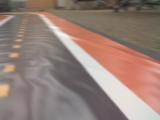

In [145]:
import os, os.path
from IPython.display import Image

image_path = '/Users/dan/mycar/data/tub-dan/3430_cam-image_array_.jpg'
Image(image_path)

Using the Pillow library (PIL), we can also view the height and and width of an image.  The image above is 120 high and 160 wide which is the standard for older Raspberry Pi camera.  Our newer Nvidia Nano V2 cameras use a 224X224 format.

In [160]:
from PIL import Image

im = Image.open('/Users/dan/mycar/data/tub-dan/3430_cam-image_array_.jpg')
width, height = im.size
print("Height =", height, "Width=", width)

Height = 120 Width= 160
